# Stock_Details_5_Years Analysis

## This dataset contains historical stock market data sourced from Yahoo Finance for the 500 largest companies by market  capitalization. 

# Attributes:


1.Date: The date corresponding to the recorded stock market data.<br>
2.Open: The opening price of the stock on a given date.<br>
3.High: The highest price of the stock reached during the trading day.<br>
4.Low: The lowest price of the stock observed during the trading day.<br>
5.Close: The closing price of the stock on a specific date.<br>
6.Volume: The volume of shares traded on the given date.<br>
7.Dividends: Any dividend payments made by the company on that date (if applicable).<br>
8.Stock Splits: Information regarding any stock splits occurring on that date.<br>
9.Company: Ticker symbol or identifier representing the respective company.<br>

# A.Exploratory Data Analysis

Loading and Explanation of Data</br>
Unique Value Analysis</br>
Missing Value Analysis</br>
Categoric Features Analysis</br>
Numeric Features Analysis</br>
Numeric Features Scaling</br>
Numeric Features - Data Melting</br>
Numeric Features - Data Visualization</br>
Correlation Analysis</br>

# B.Preparing Data

Fixing Missing Values</br>
Outlier Detection</br>
Categoric Variables - Encoding</br>

# C.Modeling

Train/Test Split</br>
Model Select & Fit</br>
Hyperparameter Tuning</br>

In [2]:


import numpy as np
import pandas as pd

import matplotlib.pyplot as plt



from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve

import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

import os

In [3]:
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import warnings


# A.Exploratory Data Analysis




In [4]:
##..........
#1.Loading and Explanation of Data
#2.Unique Value Analysis
#3.Missing Value Analysis
#4.Categoric Features Analysis
#5.Numeric Features Analysis
#6.Numeric Features Scaling
#7.Numeric Features - Data Melting
#8.Numeric Features - Data Visualization
#9.Correlation Analysis</br></br>
##........



# 1.Loading and Explanation of Data


In [5]:
data = pd.read_csv('stock_details_5_years.csv')
data.head(10)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company
0,2018-11-29 00:00:00-05:00,43.829761,43.863354,42.639594,43.083508,167080000,0.00,0.0,AAPL
1,2018-11-29 00:00:00-05:00,104.769074,105.519257,103.534595,104.636131,28123200,0.00,0.0,MSFT
2,2018-11-29 00:00:00-05:00,54.176498,55.007500,54.099998,54.729000,31004000,0.00,0.0,GOOGL
3,2018-11-29 00:00:00-05:00,83.749496,84.499496,82.616501,83.678497,132264000,0.00,0.0,AMZN
4,2018-11-29 00:00:00-05:00,39.692784,40.064904,38.735195,39.037853,54917200,0.04,0.0,NVDA
5,2018-11-29 00:00:00-05:00,135.919998,139.990005,135.660004,138.679993,24238700,0.00,0.0,META
6,2018-11-29 00:00:00-05:00,23.133333,23.166668,22.636667,22.744667,46210500,0.00,0.0,TSLA
7,2018-11-29 00:00:00-05:00,106.370278,108.796588,106.065834,107.938614,4688300,0.00,0.0,LLY
8,2018-11-29 00:00:00-05:00,135.973059,135.982718,134.059447,134.436371,8751500,0.00,0.0,V
9,2018-11-29 00:00:00-05:00,33.520714,33.891693,33.450050,33.503048,7056600,0.00,0.0,TSM


In [6]:
data.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company
602957,2023-11-29 00:00:00-05:00,26.360001,26.397499,26.120001,26.150000,1729147,0.0,0.0,PPL
602958,2023-11-29 00:00:00-05:00,27.680000,28.535000,27.680000,28.350000,1940066,0.0,0.0,FITB
602959,2023-11-29 00:00:00-05:00,75.940002,76.555000,75.257500,75.610001,298699,0.0,0.0,IFF
602960,2023-11-29 00:00:00-05:00,45.230000,45.259998,44.040001,44.209999,2217579,0.0,0.0,CCJ
602961,2023-11-29 00:00:00-05:00,84.629997,84.995003,83.529999,83.889999,830092,0.0,0.0,LYV


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602962 entries, 0 to 602961
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          602962 non-null  object 
 1   Open          602962 non-null  float64
 2   High          602962 non-null  float64
 3   Low           602962 non-null  float64
 4   Close         602962 non-null  float64
 5   Volume        602962 non-null  int64  
 6   Dividends     602962 non-null  float64
 7   Stock Splits  602962 non-null  float64
 8   Company       602962 non-null  object 
dtypes: float64(6), int64(1), object(2)
memory usage: 41.4+ MB


In [8]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', 'Company'],
      dtype='object')

# 2.Unique Value Analysis


In [9]:
for i in list(data.columns):
    print("{} -- {}".format(i, data[i].value_counts().shape[0]))

Date -- 1258
Open -- 510592
High -- 514315
Low -- 513389
Close -- 484353
Volume -- 170929
Dividends -- 960
Stock Splits -- 40
Company -- 491



# 3.Missing Value Analysis


In [10]:
data.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Company         0
dtype: int64


# 4.Categoric Features Analysis


In [22]:
categoric_vars_list = ["Date", "Open", "High", "Low", "Close", "Volume", "Dividends", "Stock Splits", "Company"]

# Categoric features visualization
data_categoric = data.loc[:, categoric_vars_list]

for i in categoric_vars_list:
    unique_values_count = data_categoric[i].nunique()
    
    # Limit to 10 unique values for clarity, adjust as needed
    if unique_values_count > 10:
        print(f"Too many unique values for '{i}', skipping visualization.")
        continue

    plt.figure()
    sns.countplot(x=i, data=data_categoric, hue="Company", palette="Set2")
    plt.title(f"Count Plot for {i}")
    plt.show()


Too many unique values for 'Date', skipping visualization.
Too many unique values for 'Open', skipping visualization.
Too many unique values for 'High', skipping visualization.
Too many unique values for 'Low', skipping visualization.
Too many unique values for 'Close', skipping visualization.
Too many unique values for 'Volume', skipping visualization.
Too many unique values for 'Dividends', skipping visualization.
Too many unique values for 'Stock Splits', skipping visualization.
Too many unique values for 'Company', skipping visualization.



# 5.Numeric Features Analysis


In [21]:
categoric_vars_list = ["Date", "Open", "High", "Low", "Close", "Volume", "Dividends", "Stock Splits", "Company"]

# Categoric features visualization
data_categoric = data.loc[:, categoric_vars_list]

for i in categoric_vars_list:
    unique_values_count = data_categoric[i].nunique()
    
    # Limit to 10 unique values for clarity, adjust as needed
    if unique_values_count > 10:
        print(f"Too many unique values for '{i}', skipping visualization.")
        continue      
        
    plt.figure()
    sns.countplot(x=i, data=data_categoric, hue="Company", palette="Set2")
    plt.title(f"Count Plot for {i}")
    plt.show()


Too many unique values for 'Date', skipping visualization.
Too many unique values for 'Open', skipping visualization.
Too many unique values for 'High', skipping visualization.
Too many unique values for 'Low', skipping visualization.
Too many unique values for 'Close', skipping visualization.
Too many unique values for 'Volume', skipping visualization.
Too many unique values for 'Dividends', skipping visualization.
Too many unique values for 'Stock Splits', skipping visualization.
Too many unique values for 'Company', skipping visualization.



# 6.Numeric Features Scaling


In [25]:
from sklearn.preprocessing import StandardScaler

# Specify numeric variables excluding "Date" and "Company"
numeric_vars_list = ["Open", "High", "Low", "Close", "Volume", "Dividends", "Stock Splits","Company"]

# Extract numeric columns from the dataset
data_numeric = data.loc[:, numeric_vars_list]

# Drop the "Company" column for scaling, as it's categorical
data_numeric_for_scaling = data_numeric.drop("Company", axis=1)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the numeric data
scaled_array = scaler.fit_transform(data_numeric_for_scaling)


# 7.Numeric Features - Data Melting


In [27]:
df_dummy = pd.DataFrame(scaled_array, columns = numeric_vars_list[:-1])
df_dummy = pd.concat([df_dummy, data.loc[:, "Company"]], axis = 1)
df_dummy.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company
0,-0.349471,-0.351215,-0.351741,-0.352158,11.666544,-0.060626,-0.006803,AAPL
1,-0.128197,-0.130229,-0.127776,-0.128718,1.608836,-0.060626,-0.006803,MSFT
2,-0.311902,-0.311273,-0.309591,-0.309884,1.817349,-0.060626,-0.006803,GOOGL
3,-0.204520,-0.205568,-0.204711,-0.204796,9.146559,-0.060626,-0.006803,AMZN
4,-0.364493,-0.364830,-0.366101,-0.366844,3.548189,0.271132,-0.006803,NVDA


In [28]:
data_melted = pd.melt(df_dummy, id_vars = "Company", var_name = "features", value_name = "value")
data_melted.head(20)
#data_melted.tail(10)

,Company,features,value
0,AAPL,Open,-0.349471
1,MSFT,Open,-0.128197
2,GOOGL,Open,-0.311902
3,AMZN,Open,-0.204520
4,NVDA,Open,-0.364493
5,META,Open,-0.015086
6,TSLA,Open,-0.424621
7,LLY,Open,-0.122383
8,V,Open,-0.014893
9,TSM,Open,-0.386904


# 8.Numeric Features - Data Visualization


In [32]:
categoric_vars_list = ["Date", "Open", "High", "Low", "Close", "Volume", "Dividends", "Stock Splits", "Company"]

# categoric features visualization
data_categoric = data.loc[:, categoric_vars_list]

for i in categoric_vars_list:
    # Check if the number of unique values is less than or equal to 10
    if len(data_categoric[i].unique()) <= 10:
        plt.figure()
        sns.countplot(x=i, data=data_categoric, hue="Company", palette="Set2")
        plt.title(i)
    else:
        print(f"Skipping {i} as it has more than 10 unique values.")



Skipping Date as it has more than 10 unique values.
Skipping Open as it has more than 10 unique values.
Skipping High as it has more than 10 unique values.
Skipping Low as it has more than 10 unique values.
Skipping Close as it has more than 10 unique values.
Skipping Volume as it has more than 10 unique values.
Skipping Dividends as it has more than 10 unique values.
Skipping Stock Splits as it has more than 10 unique values.
Skipping Company as it has more than 10 unique values.



# 9.Correlation Analysis


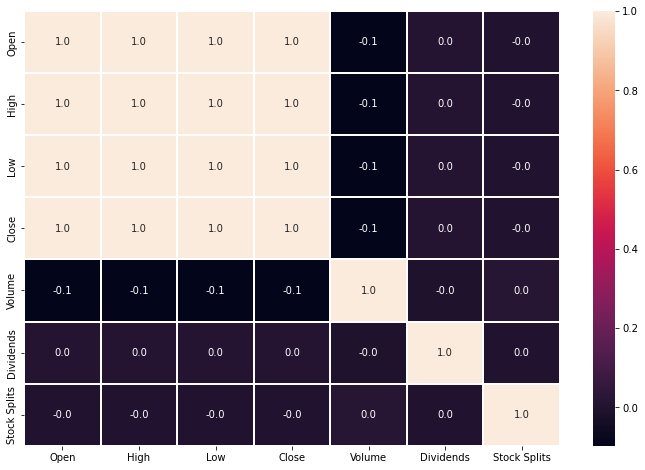

In [33]:
plt.figure(figsize = (12,8))
sns.heatmap(data.corr(), annot = True, fmt = ".1f", linewidths = 0.1)
plt.show()

# B.Preparing Data¶
Outlier Detection</br>
Categoric Variables - Encoding</br>

Outlier Detection

In [35]:
numeric_vars_list = ["Date", "Open", "High", "Low"]
data_numeric = data.loc[:, numeric_vars_list]
data_numeric.head()

,Date,Open,High,Low
0,2018-11-29 00:00:00-05:00,43.829761,43.863354,42.639594
1,2018-11-29 00:00:00-05:00,104.769074,105.519257,103.534595
2,2018-11-29 00:00:00-05:00,54.176498,55.007500,54.099998
3,2018-11-29 00:00:00-05:00,83.749496,84.499496,82.616501
4,2018-11-29 00:00:00-05:00,39.692784,40.064904,38.735195


In [36]:
data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,602962.000000,602962.000000,602962.000000,602962.000000,6.029620e+05,602962.00000,602962.000000
mean,140.074711,141.853492,138.276316,140.095204,5.895601e+06,0.00731,0.000344
std,275.401725,279.003191,271.895276,275.477969,1.381596e+07,0.12057,0.050607
min,1.052425,1.061195,1.026114,1.034884,0.000000e+00,0.00000,0.000000
25%,39.566159,40.056222,39.058151,39.563746,1.031500e+06,0.00000,0.000000
50%,79.177964,80.125563,78.193820,79.177906,2.228700e+06,0.00000,0.000000
75%,157.837190,159.746317,155.841609,157.847153,5.277400e+06,0.00000,0.000000
max,6490.259766,6525.000000,6405.000000,6509.350098,1.123003e+09,35.00000,20.000000


Categoric Variables - Encoding

In [ ]:
data_cpy = data.copy()
data_cpy = pd.get_dummies(data_cpy, columns = categoric_vars_list[:-1], drop_first = True)
# categoric_vars_list[:-1]: There should be no target feature in categoric_vars_list
data_cpy.head()



##Memory Error

In [40]:
X = data_cpy.drop(["Company"], axis = 1)
y = data_cpy[["Company"]]

In [43]:
from sklearn.preprocessing import StandardScaler

# Assuming "Date" is the first column in numeric_vars_list
numeric_vars_list = ["Open", "High", "Low", "Close", "Volume", "Dividends", "Stock Splits", "Company"]

# Exclude "Date" and "Company" from numeric_vars_list
numeric_vars_list = numeric_vars_list[1:-1]

# Create a DataFrame with only numeric columns
numeric_data = data.loc[:, numeric_vars_list]

# Standardize the numeric columns
scaler = StandardScaler()
numeric_data_standardized = scaler.fit_transform(numeric_data)

# Replace the original numeric columns with the standardized ones
data.loc[:, numeric_vars_list] = numeric_data_standardized

# Display the updated DataFrame
data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company
0,2018-11-29 00:00:00-05:00,43.829761,-0.351215,-0.351741,-0.352158,11.666544,-0.060626,-0.006803,AAPL
1,2018-11-29 00:00:00-05:00,104.769074,-0.130229,-0.127776,-0.128718,1.608836,-0.060626,-0.006803,MSFT
2,2018-11-29 00:00:00-05:00,54.176498,-0.311273,-0.309591,-0.309884,1.817349,-0.060626,-0.006803,GOOGL
3,2018-11-29 00:00:00-05:00,83.749496,-0.205568,-0.204711,-0.204796,9.146559,-0.060626,-0.006803,AMZN
4,2018-11-29 00:00:00-05:00,39.692784,-0.364830,-0.366101,-0.366844,3.548189,0.271132,-0.006803,NVDA


# C.Modeling¶
Train/Test Split</br>
Model Select & Fit</br>
Hyperparameter Tuning</br>

Train/Test Split</br>


In [63]:
X_train, X_test, y_train, y_test = train_test_split(data.sample(1000), data.sample(1000), test_size = 0.15, random_state = 42)
print("X_train: {}".format(X_train.shape))
print("X_test: {}".format(X_test.shape))
print("y_train: {}".format(y_train.shape))
print("y_test: {}".format(y_test.shape))

X_train: (850, 9)
X_test: (150, 9)
y_train: (850, 9)
y_test: (150, 9)


Model Select & Fit

In [64]:
X_train = X_train.drop('Date', axis=1)


In [65]:
# Check if 'Date' column exists in X_train
if 'Date' in X_train.columns:
    # Convert Date to numeric features
    X_train['Year'] = pd.to_datetime(X_train['Date']).dt.year
    X_train['Month'] = pd.to_datetime(X_train['Date']).dt.month
    X_train['Day'] = pd.to_datetime(X_train['Date']).dt.day
    
    # Drop the original 'Date' column
    X_train = X_train.drop('Date', axis=1)
else:
    print("The 'Date' column does not exist in X_train.")


The 'Date' column does not exist in X_train.


In [66]:
l_reg = LogisticRegression(max_iter=1000)  # Adjust the number of iterations as needed


In [68]:
from sklearn.preprocessing import OneHotEncoder

# Assuming 'Company' is the categorical variable
encoder = OneHotEncoder()
X_train_encoded = encoder.fit_transform(X_train[['Company']])


In [70]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'Company' is the categorical variable
encoder = LabelEncoder()
X_train_encoded = encoder.fit_transform(X_train['Company'])


In [71]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

# Assuming 'Company' is the categorical variable
categorical_features = ['Company']
numeric_features = [col for col in X_train.columns if col not in categorical_features]

# Create a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Create the pipeline with preprocessor and logistic regression
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)


ValueError: y should be a 1d array, got an array of shape (850, 9) instead.

In [67]:
l_reg = LogisticRegression()
l_reg.fit(X_train, y_train)

ValueError: could not convert string to float: 'AVGO'

Hyperparameter Tuning